# 常用激活函数可视化与详解

本notebook将展示深度学习中常用的激活函数，包括它们的数学公式、图形可视化以及详细解释。

## 目录
1. [环境准备](#环境准备)
2. [激活函数概述](#激活函数概述)
3. [线性激活函数](#线性激活函数)
4. [Sigmoid激活函数](#Sigmoid激活函数)
5. [Tanh激活函数](#Tanh激活函数)
6. [ReLU激活函数](#ReLU激活函数)
7. [Leaky ReLU激活函数](#Leaky-ReLU激活函数)
8. [ELU激活函数](#ELU激活函数)
9. [Swish激活函数](#Swish激活函数)
10. [GELU激活函数](#GELU激活函数)
11. [激活函数对比](#激活函数对比)
12. [总结](#总结)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号
plt.rcParams['figure.figsize'] = (12, 8)      # 设置图表大小
plt.rcParams['font.size'] = 12                # 设置字体大小

print("环境设置完成！")

环境设置完成！


## 激活函数概述

激活函数是神经网络中的重要组成部分，它们为神经网络引入非线性特性，使得网络能够学习复杂的函数映射关系。

### 激活函数的作用：
1. **引入非线性**：如果没有激活函数，多层神经网络就等价于单层线性变换
2. **控制信息传递**：决定神经元是否被激活，控制信息在网络中的流动
3. **梯度传播**：影响反向传播过程中梯度的计算和传递

### 选择激活函数的考虑因素：
- **梯度消失/爆炸**：函数的导数特性
- **计算效率**：函数的计算复杂度
- **输出范围**：函数的值域
- **零中心化**：输出是否以零为中心
- **单调性**：函数是否单调递增

In [2]:
# 定义输入范围
x = np.linspace(-5, 5, 1000)

# 定义各种激活函数
def linear(x):
    """线性激活函数"""
    return x

def sigmoid(x):
    """Sigmoid激活函数"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    """Tanh激活函数"""
    return np.tanh(x)

def relu(x):
    """ReLU激活函数"""
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    """Leaky ReLU激活函数"""
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    """ELU激活函数"""
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    """Swish激活函数"""
    return x * sigmoid(x)

def gelu(x):
    """GELU激活函数"""
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

# 定义导数函数
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

print("激活函数定义完成！")

激活函数定义完成！


## 线性激活函数

线性激活函数是最简单的激活函数，它直接输出输入值。

### 数学公式：
$$f(x) = x$$

### 导数：
$$f'(x) = 1$$

### 特点：
- **优点**：计算简单，不会造成梯度消失
- **缺点**：无法引入非线性，多层网络等价于单层线性变换
- **使用场景**：通常用于回归问题的输出层

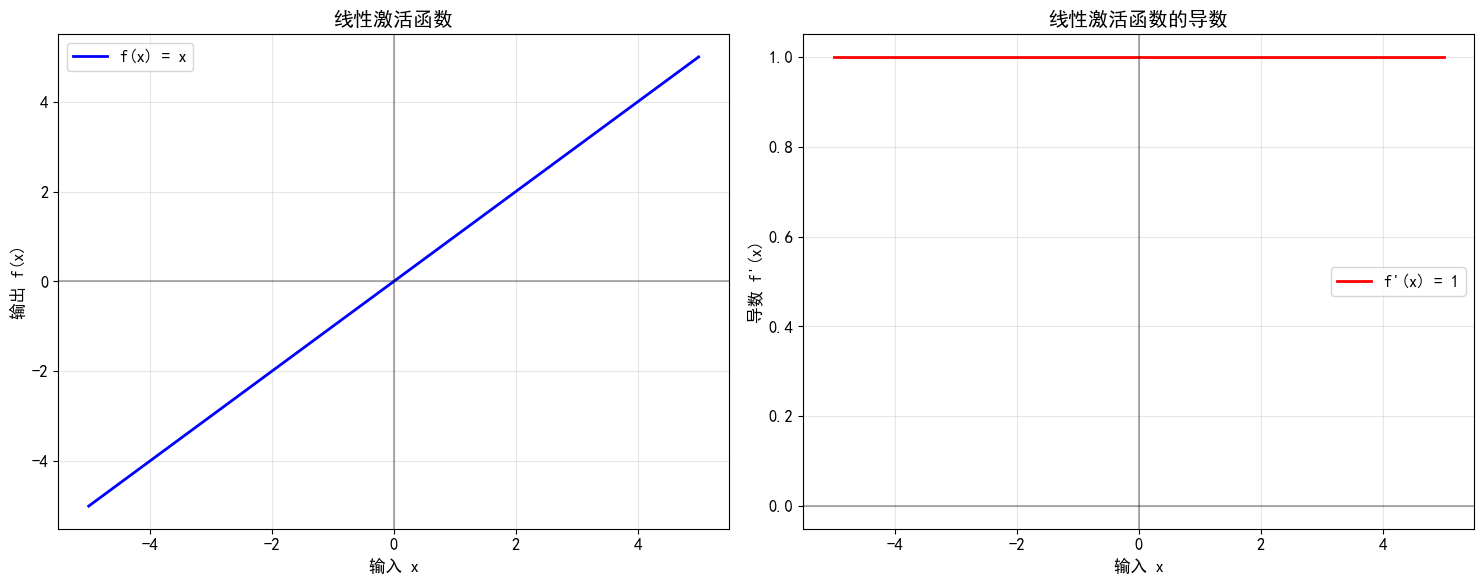

In [3]:
# 绘制线性激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 函数图像
ax1.plot(x, linear(x), 'b-', linewidth=2, label='f(x) = x')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('线性激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# 导数图像
ax2.plot(x, np.ones_like(x), 'r-', linewidth=2, label="f'(x) = 1")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('线性激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## Sigmoid激活函数

Sigmoid函数是一个S型曲线，将输入映射到(0,1)区间。

### 数学公式：
$$f(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}$$

### 导数：
$$f'(x) = f(x) \cdot (1 - f(x)) = \frac{e^{-x}}{(1 + e^{-x})^2}$$

### 特点：
- **优点**：
  - 输出范围在(0,1)，可以解释为概率
  - 函数连续且可导
  - 单调递增
- **缺点**：
  - 存在梯度消失问题（当|x|很大时，导数接近0）
  - 输出不是零中心化的
  - 计算涉及指数运算，相对较慢
- **使用场景**：二分类问题的输出层，早期的隐藏层

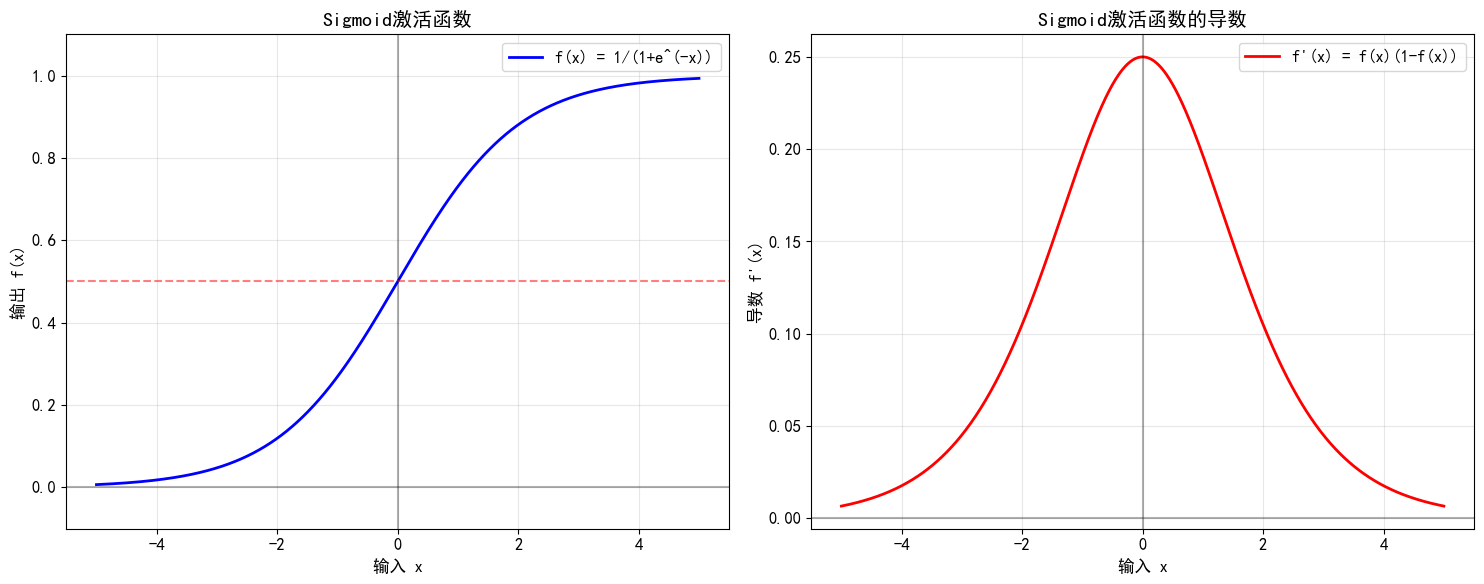

Sigmoid函数的关键特性：
f(0) = 0.5000
f(-∞) ≈ 0.000045
f(+∞) ≈ 0.999955
最大导数值：0.2500 (在x=0处)


In [4]:
# 绘制Sigmoid激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_sigmoid = sigmoid(x)
y_sigmoid_derivative = sigmoid_derivative(x)

# 函数图像
ax1.plot(x, y_sigmoid, 'b-', linewidth=2, label='f(x) = 1/(1+e^(-x))')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('Sigmoid激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='y=0.5')
ax1.set_ylim(-0.1, 1.1)

# 导数图像
ax2.plot(x, y_sigmoid_derivative, 'r-', linewidth=2, label="f'(x) = f(x)(1-f(x))")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('Sigmoid激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# 打印一些关键点的值
print("Sigmoid函数的关键特性：")
print(f"f(0) = {sigmoid(0):.4f}")
print(f"f(-∞) ≈ {sigmoid(-10):.6f}")
print(f"f(+∞) ≈ {sigmoid(10):.6f}")
print(f"最大导数值：{np.max(y_sigmoid_derivative):.4f} (在x=0处)")

## Tanh激活函数

Tanh（双曲正切）函数将输入映射到(-1,1)区间，是Sigmoid函数的变形。

### 数学公式：
$$f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}$$

### 与Sigmoid的关系：
$$\tanh(x) = 2 \cdot \text{sigmoid}(2x) - 1$$

### 导数：
$$f'(x) = 1 - \tanh^2(x) = 1 - f(x)^2$$

### 特点：
- **优点**：
  - 输出范围在(-1,1)，零中心化
  - 比Sigmoid函数梯度更强
  - 函数连续且可导
- **缺点**：
  - 仍然存在梯度消失问题
  - 计算涉及指数运算
- **使用场景**：RNN中的门控单元，早期的隐藏层

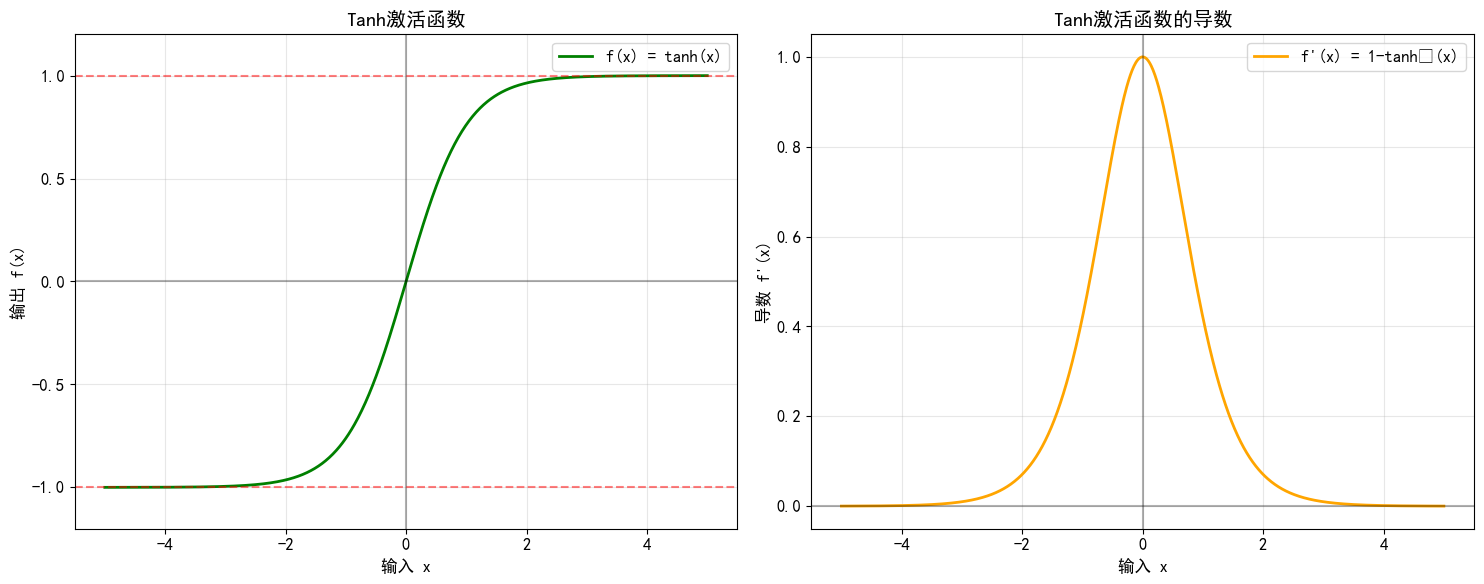

Tanh函数的关键特性：
f(0) = 0.0000
f(-∞) ≈ -1.000000
f(+∞) ≈ 1.000000
最大导数值：1.0000 (在x=0处)


In [5]:
# 绘制Tanh激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_tanh = tanh(x)
y_tanh_derivative = tanh_derivative(x)

# 函数图像
ax1.plot(x, y_tanh, 'g-', linewidth=2, label='f(x) = tanh(x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('Tanh激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.axhline(y=1, color='r', linestyle='--', alpha=0.5)
ax1.axhline(y=-1, color='r', linestyle='--', alpha=0.5)
ax1.set_ylim(-1.2, 1.2)

# 导数图像
ax2.plot(x, y_tanh_derivative, 'orange', linewidth=2, label="f'(x) = 1-tanh²(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('Tanh激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# 打印一些关键点的值
print("Tanh函数的关键特性：")
print(f"f(0) = {tanh(0):.4f}")
print(f"f(-∞) ≈ {tanh(-10):.6f}")
print(f"f(+∞) ≈ {tanh(10):.6f}")
print(f"最大导数值：{np.max(y_tanh_derivative):.4f} (在x=0处)")

## ReLU激活函数

ReLU（Rectified Linear Unit）是目前最常用的激活函数之一。

### 数学公式：
$$f(x) = \max(0, x) = \begin{cases} 
x & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$

### 导数：
$$f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$

### 特点：
- **优点**：
  - 计算简单，训练速度快
  - 有效缓解梯度消失问题
  - 具有稀疏性（部分神经元输出为0）
  - 生物学上更合理（神经元要么激活要么不激活）
- **缺点**：
  - Dead ReLU问题：负区间梯度为0，可能导致神经元"死亡"
  - 输出不是零中心化的
  - 在x=0处不可导
- **使用场景**：深度神经网络的隐藏层，CNN中广泛使用

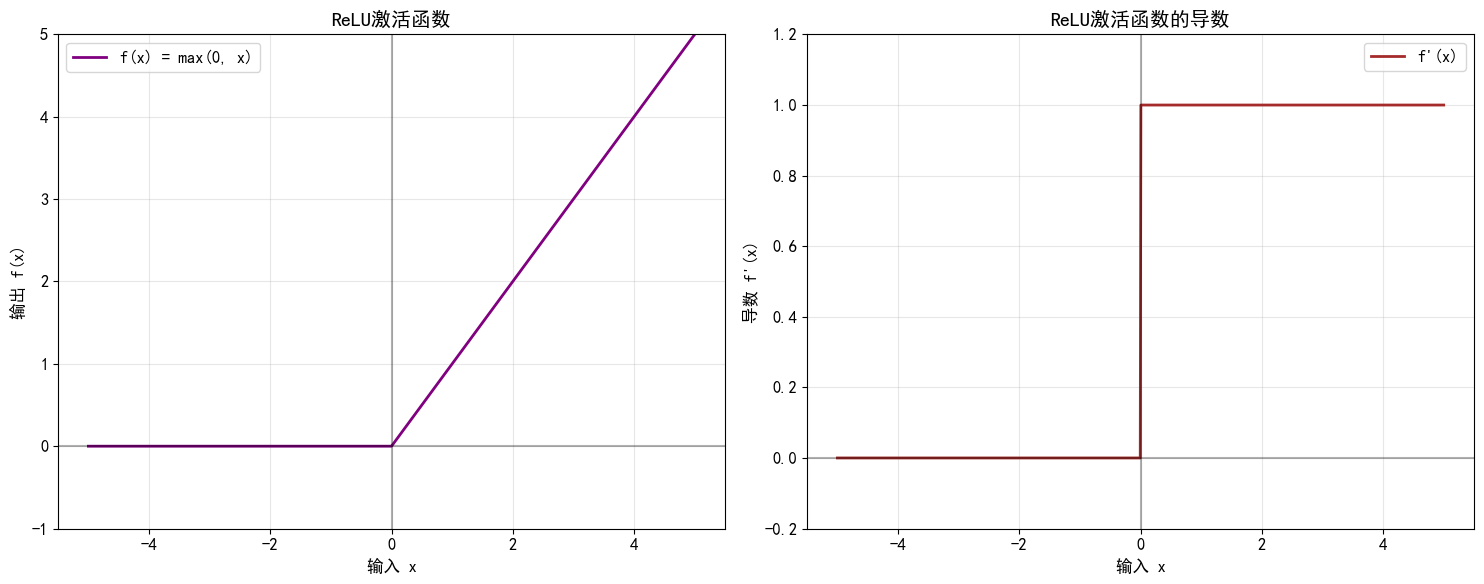

ReLU函数的特性分析：
正区间样例：f(2) = 2
负区间样例：f(-2) = 0
零点：f(0) = 0

Dead ReLU问题：当输入始终为负时，神经元输出恒为0，梯度也为0，无法更新权重


In [6]:
# 绘制ReLU激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

# 函数图像
ax1.plot(x, y_relu, 'purple', linewidth=2, label='f(x) = max(0, x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('ReLU激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylim(-1, 5)

# 导数图像
ax2.plot(x, y_relu_derivative, 'brown', linewidth=2, label="f'(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('ReLU激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

# 展示Dead ReLU问题
print("ReLU函数的特性分析：")
print(f"正区间样例：f(2) = {relu(2)}")
print(f"负区间样例：f(-2) = {relu(-2)}")
print(f"零点：f(0) = {relu(0)}")
print("\nDead ReLU问题：当输入始终为负时，神经元输出恒为0，梯度也为0，无法更新权重")

## Leaky ReLU激活函数

Leaky ReLU是ReLU的改进版本，旨在解决Dead ReLU问题。

### 数学公式：
$$f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}$$

其中 $\alpha$ 是一个小的正数，通常设为0.01。

### 导数：
$$f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}$$

### 特点：
- **优点**：
  - 解决了Dead ReLU问题
  - 负区间有小的梯度，避免神经元"死亡"
  - 保持了ReLU的计算简单性
- **缺点**：
  - 引入了超参数α需要调优
  - 负区间的梯度较小，可能导致学习缓慢
- **使用场景**：需要避免神经元死亡的深度网络

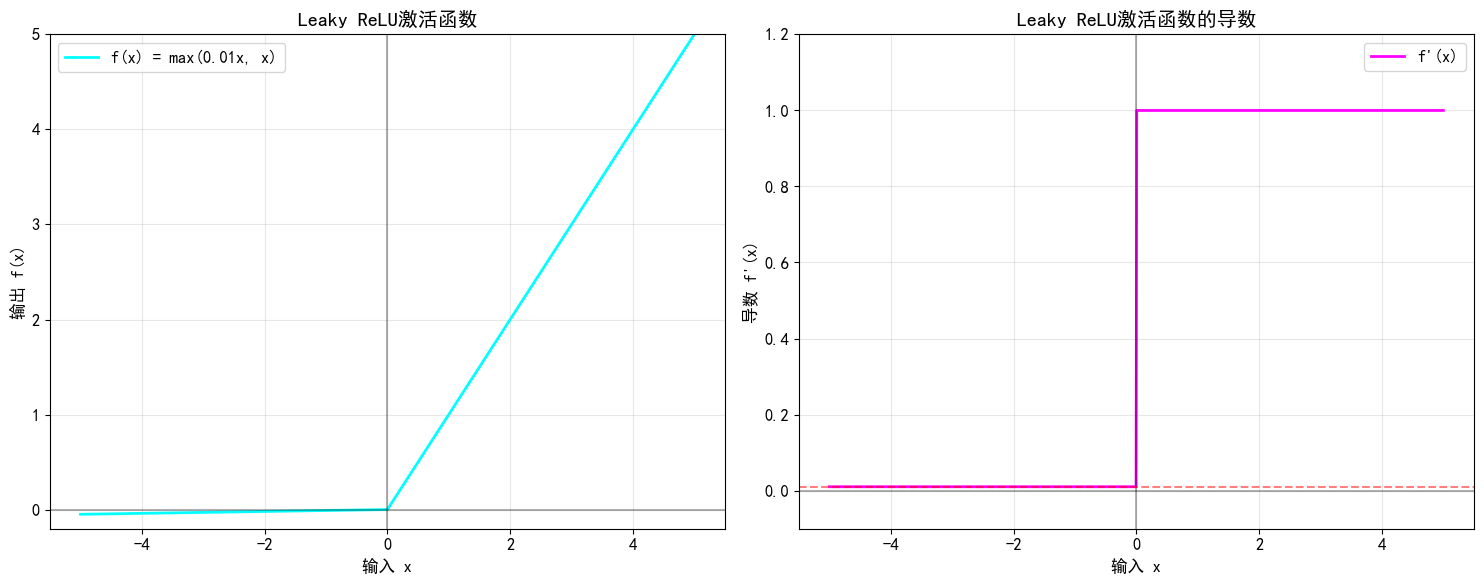

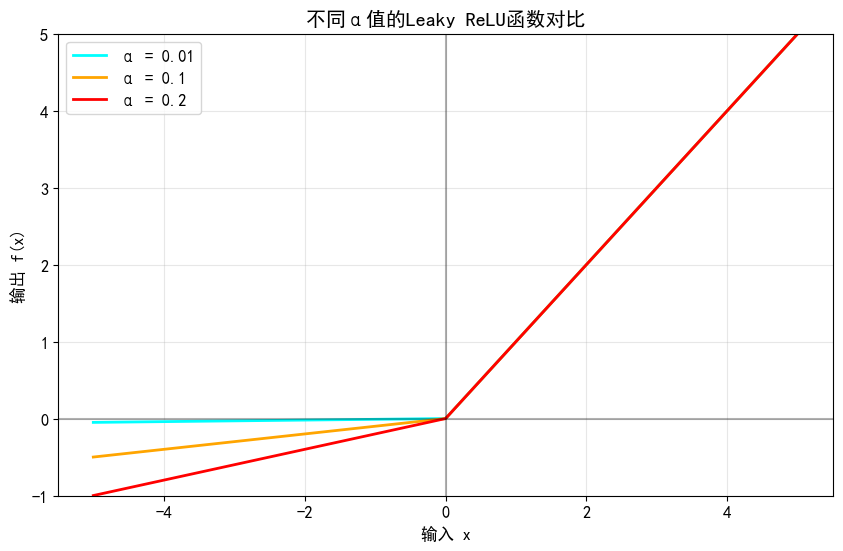

In [7]:
# 绘制Leaky ReLU激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

alpha = 0.01
y_leaky_relu = leaky_relu(x, alpha)
y_leaky_relu_derivative = leaky_relu_derivative(x, alpha)

# 函数图像
ax1.plot(x, y_leaky_relu, 'cyan', linewidth=2, label=f'f(x) = max({alpha}x, x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('Leaky ReLU激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylim(-0.2, 5)

# 导数图像
ax2.plot(x, y_leaky_relu_derivative, 'magenta', linewidth=2, label=f"f'(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('Leaky ReLU激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.axhline(y=alpha, color='r', linestyle='--', alpha=0.5, label=f'α={alpha}')
ax2.set_ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

# 比较不同α值的效果
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
alphas = [0.01, 0.1, 0.2]
colors = ['cyan', 'orange', 'red']

for i, a in enumerate(alphas):
    y = leaky_relu(x, a)
    ax.plot(x, y, colors[i], linewidth=2, label=f'α = {a}')

ax.grid(True, alpha=0.3)
ax.set_xlabel('输入 x')
ax.set_ylabel('输出 f(x)')
ax.set_title('不同α值的Leaky ReLU函数对比')
ax.legend()
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.set_ylim(-1, 5)
plt.show()

## ELU激活函数

ELU（Exponential Linear Unit）结合了ReLU和指数函数的优点。

### 数学公式：
$$f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha(e^x - 1) & \text{if } x \leq 0
\end{cases}$$

其中 $\alpha > 0$ 是一个超参数，通常设为1.0。

### 导数：
$$f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha e^x = f(x) + \alpha & \text{if } x \leq 0
\end{cases}$$

### 特点：
- **优点**：
  - 负值时有非零输出，避免了Dead ReLU问题
  - 负值时输出均值接近零，有助于加速学习
  - 在零点处连续且可导
  - 具有负饱和性，对噪声更鲁棒
- **缺点**：
  - 计算复杂度比ReLU高（涉及指数运算）
  - 引入了超参数α需要调优
- **使用场景**：对训练稳定性要求较高的深度网络

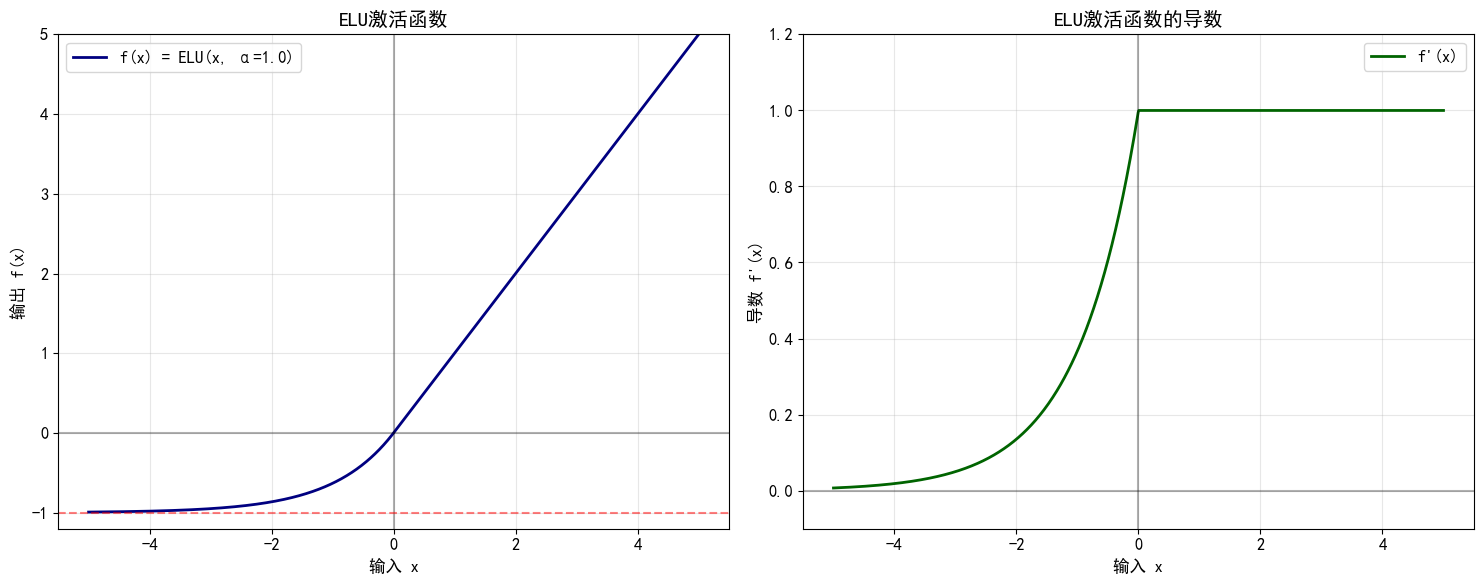

ELU函数的关键特性：
f(0) = 0.0000
f(-∞) → -1.0000
正区间梯度：1
x=0处的梯度：1.0000
负区间饱和值：-α = -1.0


In [8]:
# 绘制ELU激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

alpha_elu = 1.0
y_elu = elu(x, alpha_elu)
y_elu_derivative = elu_derivative(x, alpha_elu)

# 函数图像
ax1.plot(x, y_elu, 'navy', linewidth=2, label=f'f(x) = ELU(x, α={alpha_elu})')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('ELU激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.axhline(y=-alpha_elu, color='r', linestyle='--', alpha=0.5, label=f'y=-α')
ax1.set_ylim(-1.2, 5)

# 导数图像
ax2.plot(x, y_elu_derivative, 'darkgreen', linewidth=2, label="f'(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('ELU激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

# ELU的关键特性
print("ELU函数的关键特性：")
print(f"f(0) = {elu(0, alpha_elu):.4f}")
print(f"f(-∞) → {-alpha_elu:.4f}")
print(f"正区间梯度：1")
print(f"x=0处的梯度：{elu_derivative(0, alpha_elu):.4f}")
print(f"负区间饱和值：-α = {-alpha_elu}")

## Swish激活函数

Swish是由Google提出的一种自门控激活函数，在某些任务上表现优于ReLU。

### 数学公式：
$$f(x) = x \cdot \text{sigmoid}(x) = \frac{x}{1 + e^{-x}}$$

### 导数：
$$f'(x) = \text{sigmoid}(x) + x \cdot \text{sigmoid}(x) \cdot (1 - \text{sigmoid}(x))$$
$$= \text{sigmoid}(x)(1 + x(1 - \text{sigmoid}(x)))$$

### 特点：
- **优点**：
  - 无界性：正区间无上界，有利于避免梯度消失
  - 有界性：负区间有下界（趋向于0）
  - 光滑：处处可导，没有尖点
  - 自门控：函数本身提供了门控机制
- **缺点**：
  - 计算复杂度较高（需要计算sigmoid）
  - 训练初期可能不稳定
- **使用场景**：深度网络，特别是在需要更好梯度流的场景

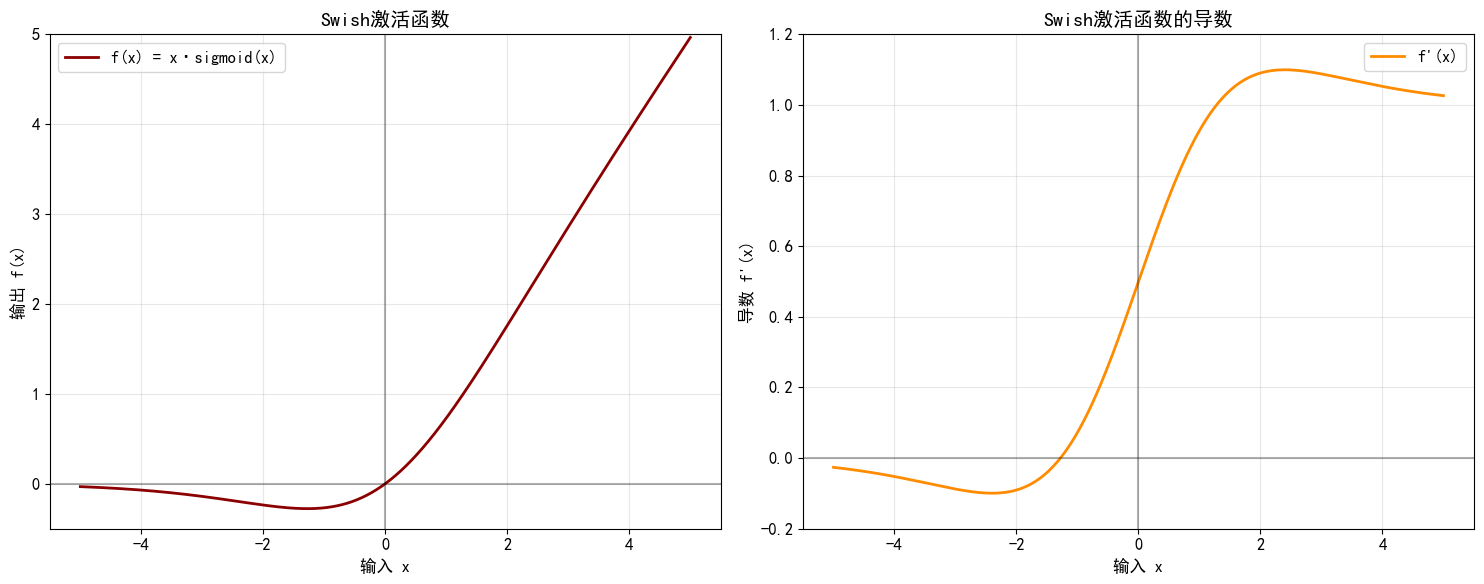

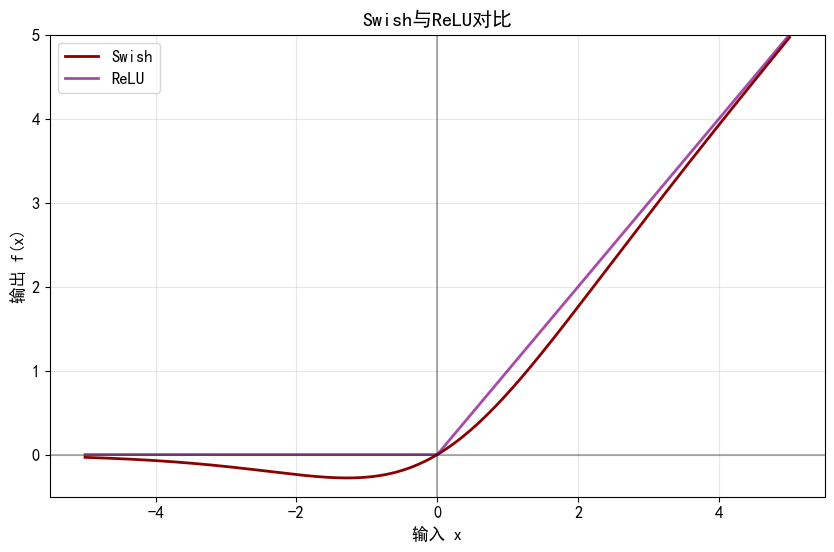

Swish函数的特性：
f(0) = 0.0000
最小值约在 x ≈ -1.28 处，值为 -0.2785
导数最大值：1.0998


In [9]:
# 绘制Swish激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_swish = swish(x)
# Swish导数的计算
def swish_derivative(x):
    s = sigmoid(x)
    return s * (1 + x * (1 - s))

y_swish_derivative = swish_derivative(x)

# 函数图像
ax1.plot(x, y_swish, 'darkred', linewidth=2, label='f(x) = x·sigmoid(x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('Swish激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylim(-0.5, 5)

# 导数图像
ax2.plot(x, y_swish_derivative, 'darkorange', linewidth=2, label="f'(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('Swish激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

# Swish与ReLU的比较
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, y_swish, 'darkred', linewidth=2, label='Swish')
ax.plot(x, relu(x), 'purple', linewidth=2, label='ReLU', alpha=0.7)
ax.grid(True, alpha=0.3)
ax.set_xlabel('输入 x')
ax.set_ylabel('输出 f(x)')
ax.set_title('Swish与ReLU对比')
ax.legend()
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.set_ylim(-0.5, 5)
plt.show()

print("Swish函数的特性：")
print(f"f(0) = {swish(0):.4f}")
print(f"最小值约在 x ≈ -1.28 处，值为 {np.min(y_swish):.4f}")
print(f"导数最大值：{np.max(y_swish_derivative):.4f}")

## GELU激活函数

GELU（Gaussian Error Linear Unit）是基于输入的概率分布的激活函数，在Transformer中广泛使用。

### 数学公式：
$$f(x) = x \cdot P(X \leq x) = x \cdot \Phi(x) = \frac{x}{2}\left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right]$$

其中 $\Phi(x)$ 是标准正态分布的累积分布函数，$\text{erf}$ 是误差函数。

### 近似公式：
$$f(x) \approx x \cdot \text{sigmoid}(1.702x) \approx 0.5x\left(1 + \tanh\left(\sqrt{\frac{2}{\pi}}\left(x + 0.044715x^3\right)\right)\right)$$

### 导数：
$$f'(x) = \Phi(x) + x \cdot \phi(x)$$

其中 $\phi(x)$ 是标准正态分布的概率密度函数。

### 特点：
- **优点**：
  - 结合了随机正则化的思想
  - 在Transformer等模型中表现出色
  - 光滑且可导
  - 具有概率解释性
- **缺点**：
  - 计算复杂度较高
  - 需要误差函数的计算
- **使用场景**：Transformer、BERT、GPT等自然语言处理模型

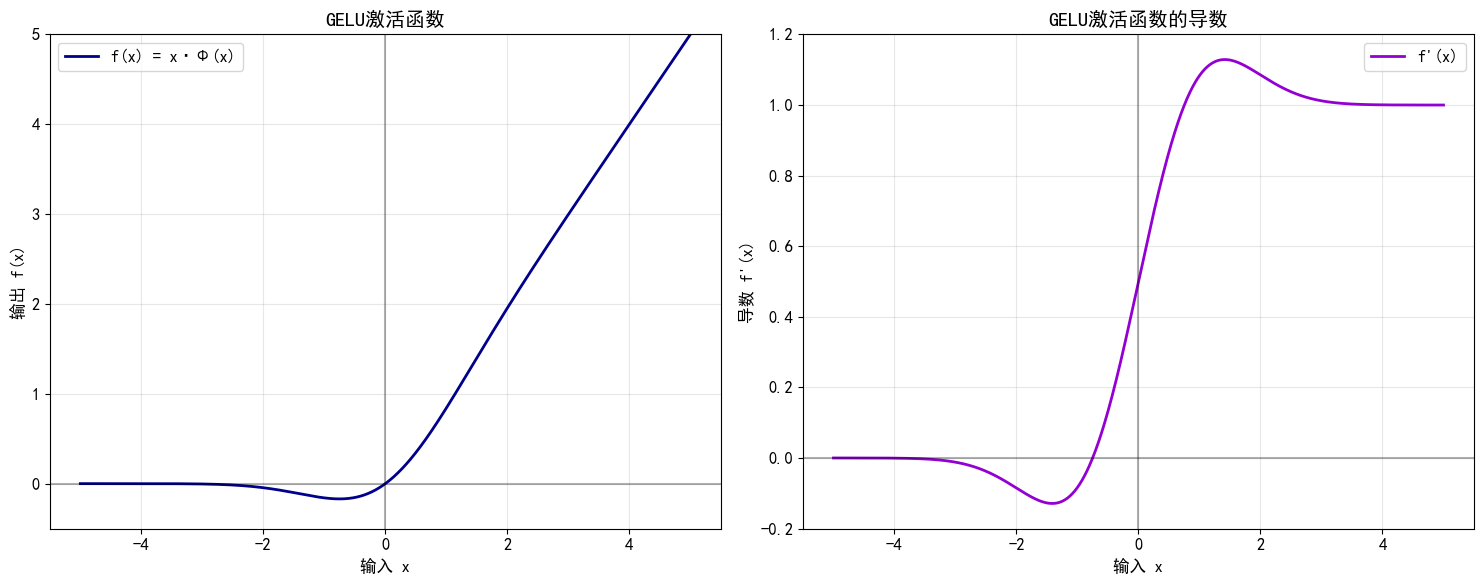

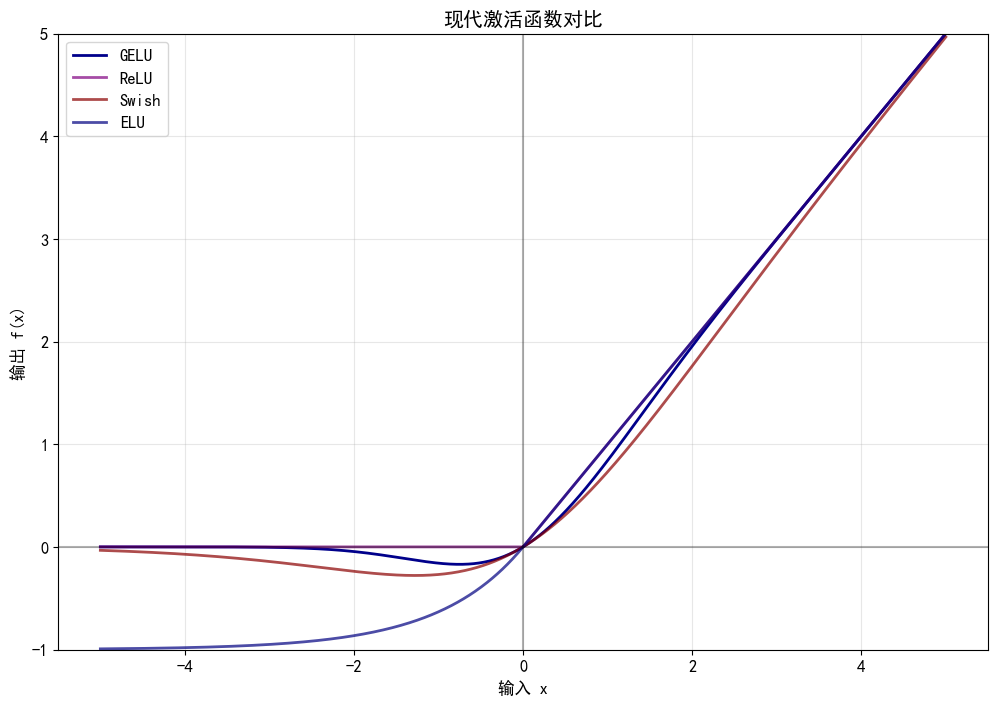

GELU函数的特性：
f(0) = 0.0000
最小值约为：-0.1700
f(1) = 0.8413
f(-1) = -0.1587


In [10]:
# 绘制GELU激活函数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_gelu = gelu(x)

# GELU导数的计算
def gelu_derivative(x):
    # 使用数值差分近似计算导数
    h = 1e-7
    return (gelu(x + h) - gelu(x - h)) / (2 * h)

y_gelu_derivative = gelu_derivative(x)

# 函数图像
ax1.plot(x, y_gelu, 'darkblue', linewidth=2, label='f(x) = x·Φ(x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('GELU激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylim(-0.5, 5)

# 导数图像
ax2.plot(x, y_gelu_derivative, 'darkviolet', linewidth=2, label="f'(x)")
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel("导数 f'(x)")
ax2.set_title('GELU激活函数的导数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

# GELU与其他激活函数的比较
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, y_gelu, 'darkblue', linewidth=2, label='GELU')
ax.plot(x, relu(x), 'purple', linewidth=2, label='ReLU', alpha=0.7)
ax.plot(x, y_swish, 'darkred', linewidth=2, label='Swish', alpha=0.7)
ax.plot(x, y_elu, 'navy', linewidth=2, label='ELU', alpha=0.7)
ax.grid(True, alpha=0.3)
ax.set_xlabel('输入 x')
ax.set_ylabel('输出 f(x)')
ax.set_title('现代激活函数对比')
ax.legend()
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.set_ylim(-1, 5)
plt.show()

print("GELU函数的特性：")
print(f"f(0) = {gelu(0):.4f}")
print(f"最小值约为：{np.min(y_gelu):.4f}")
print(f"f(1) = {gelu(1):.4f}")
print(f"f(-1) = {gelu(-1):.4f}")

## 激活函数对比

让我们对所有激活函数进行全面对比，分析它们的特性和适用场景。

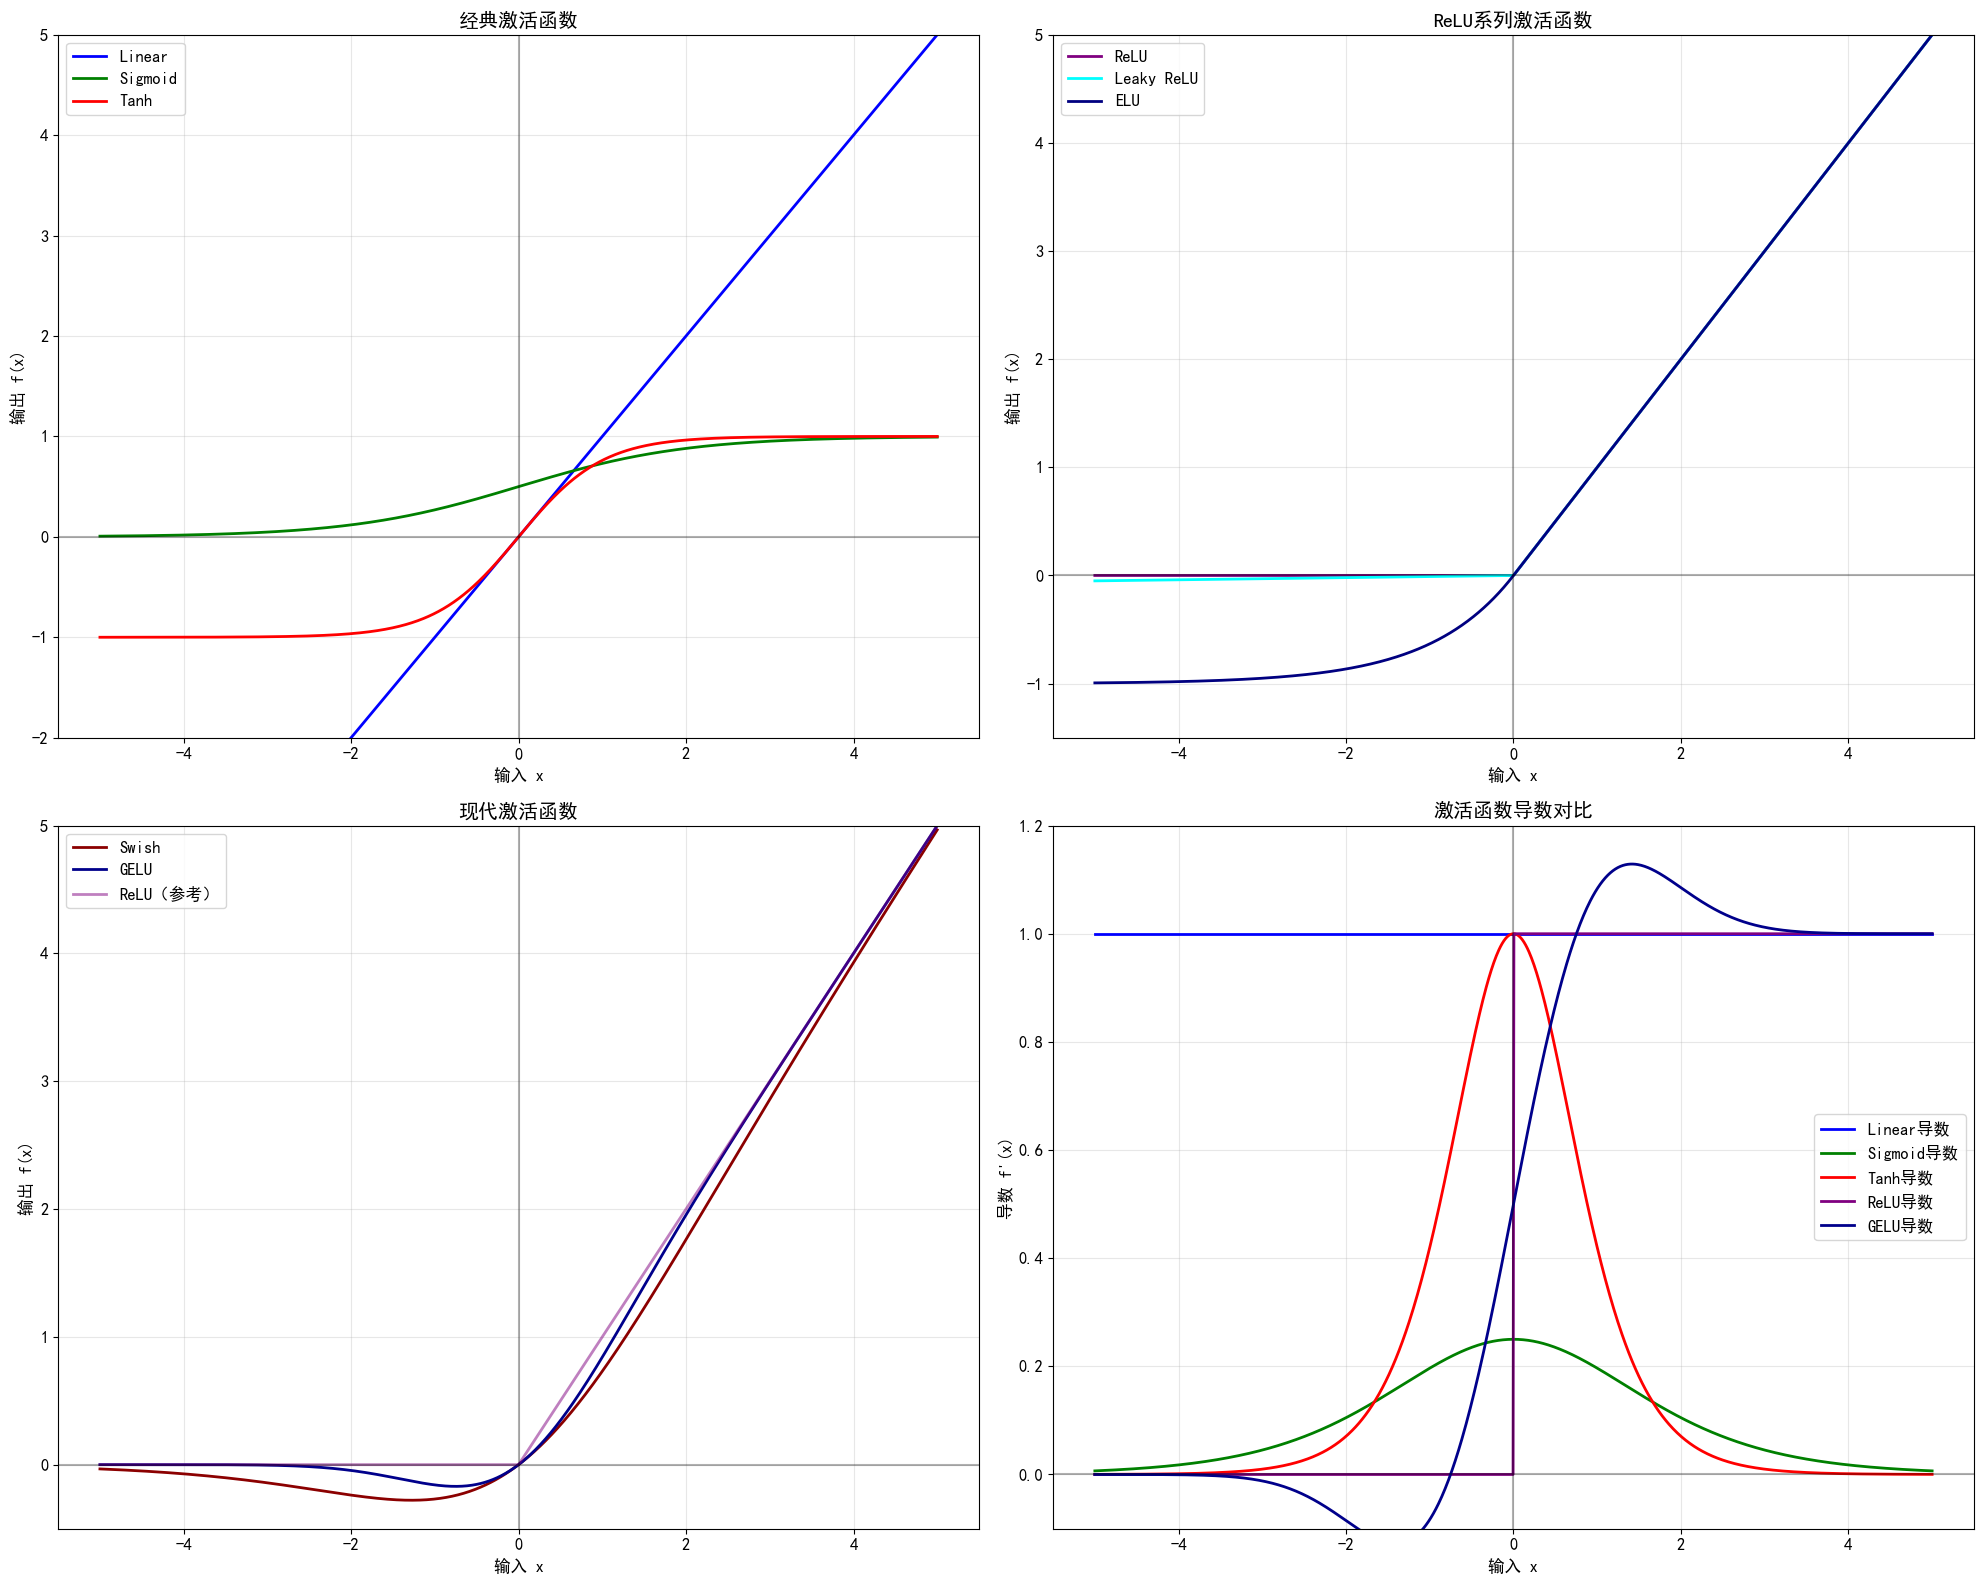

In [12]:
# 创建全面对比图
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 子图1：经典激活函数
ax1.plot(x, linear(x), 'b-', linewidth=2, label='Linear')
ax1.plot(x, sigmoid(x), 'g-', linewidth=2, label='Sigmoid')
ax1.plot(x, tanh(x), 'r-', linewidth=2, label='Tanh')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('输入 x')
ax1.set_ylabel('输出 f(x)')
ax1.set_title('经典激活函数')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylim(-2, 5)

# 子图2：ReLU系列
ax2.plot(x, relu(x), 'purple', linewidth=2, label='ReLU')
ax2.plot(x, leaky_relu(x), 'cyan', linewidth=2, label='Leaky ReLU')
ax2.plot(x, elu(x), 'navy', linewidth=2, label='ELU')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('输入 x')
ax2.set_ylabel('输出 f(x)')
ax2.set_title('ReLU系列激活函数')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylim(-1.5, 5)

# 子图3：现代激活函数
ax3.plot(x, swish(x), 'darkred', linewidth=2, label='Swish')
ax3.plot(x, gelu(x), 'darkblue', linewidth=2, label='GELU')
ax3.plot(x, relu(x), 'purple', linewidth=2, label='ReLU（参考）', alpha=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('输入 x')
ax3.set_ylabel('输出 f(x)')
ax3.set_title('现代激活函数')
ax3.legend()
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax3.set_ylim(-0.5, 5)

# 子图4：导数对比
ax4.plot(x, np.ones_like(x), 'b-', linewidth=2, label='Linear导数')
ax4.plot(x, sigmoid_derivative(x), 'g-', linewidth=2, label='Sigmoid导数')
ax4.plot(x, tanh_derivative(x), 'r-', linewidth=2, label='Tanh导数')
ax4.plot(x, relu_derivative(x), 'purple', linewidth=2, label='ReLU导数')
ax4.plot(x, gelu_derivative(x), 'darkblue', linewidth=2, label='GELU导数')
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('输入 x')
ax4.set_ylabel("导数 f'(x)")
ax4.set_title('激活函数导数对比')
ax4.legend()
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax4.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax4.set_ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

In [13]:
# 创建激活函数特性对比表
import pandas as pd

# 定义特性对比数据
activation_comparison = {
    '激活函数': ['Linear', 'Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU', 'ELU', 'Swish', 'GELU'],
    '输出范围': ['(-∞, +∞)', '(0, 1)', '(-1, 1)', '[0, +∞)', '(-∞, +∞)', '(-α, +∞)', '(-∞, +∞)', '(-∞, +∞)'],
    '零中心化': ['是', '否', '是', '否', '否', '近似', '否', '否'],
    '单调性': ['是', '是', '是', '是', '是', '否', '否', '否'],
    '梯度消失': ['无', '严重', '中等', '无', '无', '轻微', '轻微', '轻微'],
    '计算复杂度': ['极低', '中等', '中等', '极低', '极低', '中等', '高', '高'],
    '死神经元': ['无', '无', '无', '有', '无', '无', '无', '无'],
    '主要应用': ['回归输出', '二分类输出', 'RNN门控', '深度网络', '改进ReLU', '稳定训练', '深度网络', 'Transformer']
}

df_comparison = pd.DataFrame(activation_comparison)

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("激活函数特性对比表：")
print("=" * 120)
print(df_comparison.to_string(index=False))
print("=" * 120)

激活函数特性对比表：
      激活函数     输出范围 零中心化 单调性 梯度消失 计算复杂度 死神经元        主要应用
    Linear (-∞, +∞)    是   是    无    极低    无        回归输出
   Sigmoid   (0, 1)    否   是   严重    中等    无       二分类输出
      Tanh  (-1, 1)    是   是   中等    中等    无       RNN门控
      ReLU  [0, +∞)    否   是    无    极低    有        深度网络
Leaky ReLU (-∞, +∞)    否   是    无    极低    无      改进ReLU
       ELU (-α, +∞)   近似   否   轻微    中等    无        稳定训练
     Swish (-∞, +∞)    否   否   轻微     高    无        深度网络
      GELU (-∞, +∞)    否   否   轻微     高    无 Transformer


## 激活函数选择指南

### 1. 根据任务类型选择：

**分类任务：**
- **二分类输出层**：Sigmoid
- **多分类输出层**：Softmax（基于线性变换）
- **隐藏层**：ReLU、Swish、GELU

**回归任务：**
- **输出层**：Linear（无激活函数）
- **隐藏层**：ReLU、ELU、Swish

### 2. 根据网络深度选择：

**浅层网络（<5层）：**
- Sigmoid、Tanh、ReLU 都可以使用

**深层网络（>10层）：**
- 避免使用Sigmoid和Tanh（梯度消失）
- 优先选择ReLU、Leaky ReLU、ELU

**超深网络（>50层）：**
- 使用ReLU配合BatchNorm
- 考虑残差连接
- 可尝试Swish、GELU

### 3. 根据具体需求选择：

**训练速度优先：**
- ReLU（计算最简单）

**训练稳定性优先：**
- ELU、Swish

**避免神经元死亡：**
- Leaky ReLU、ELU、Swish、GELU

**自然语言处理：**
- GELU（Transformer标准）
- Swish

**计算机视觉：**
- ReLU（CNN标准）
- Leaky ReLU

### 4. 实践建议：

1. **默认选择**：从ReLU开始，它在大多数情况下表现良好
2. **遇到问题时调整**：
   - 训练不稳定 → 尝试ELU或Swish
   - 梯度消失 → 避免Sigmoid/Tanh，使用ReLU系列
   - 神经元死亡 → 使用Leaky ReLU或ELU
3. **超参数调优**：不同激活函数可能需要不同的学习率
4. **实验验证**：在具体任务上比较不同激活函数的效果

## 总结

激活函数是神经网络的核心组件，正确选择激活函数对模型性能至关重要：

### 关键要点：

1. **非线性是关键**：激活函数为神经网络引入非线性，使其能够学习复杂的函数映射

2. **梯度流很重要**：现代激活函数的设计重点是保持良好的梯度流，避免梯度消失

3. **没有万能的激活函数**：不同任务、不同网络结构可能需要不同的激活函数

4. **计算效率vs性能**：需要在计算复杂度和模型性能之间找到平衡

### 发展趋势：

- **从饱和到非饱和**：Sigmoid/Tanh → ReLU系列
- **从硬激活到软激活**：ReLU → Swish/GELU
- **自适应激活函数**：可学习的激活函数（如PReLU）
- **任务特定激活函数**：针对特定任务设计的激活函数

### 最佳实践：

1. **先使用标准选择**：CNN用ReLU，Transformer用GELU
2. **监控训练过程**：观察梯度流和激活分布
3. **实验不同选择**：在验证集上比较不同激活函数
4. **考虑组合使用**：不同层可以使用不同的激活函数

通过本notebook的学习，你应该对各种激活函数有了深入的理解。在实际应用中，建议根据具体任务需求选择合适的激活函数，并通过实验验证效果。